In [8]:
import torch
import pytorch_lightning
from pathlib import Path

import numpy as np
import pytorch_lightning
import torch
import torchvision.models.mobilenetv2
from torch.utils.data import DataLoader

from data_loading import Subset, CelebADataset
from models.mini_models import Discriminator, Generator
import matplotlib.pyplot as plt

In [9]:
torch.set_grad_enabled(False)

In [3]:
from importlib.util import spec_from_file_location, module_from_spec
from utils import DictWrapper
spec = spec_from_file_location(
    'config1',
    str(Path('mlruns/1/266c89e4e3f945e4945b36cf7ee37de1/artifacts/config1.py').resolve())
)
config = module_from_spec(spec)
spec.loader.exec_module(config)
config = {k: getattr(config, k) for k in dir(config) if not k.startswith('_')}
config = DictWrapper(config)
from engine import Controller
model_ = Controller.load_from_checkpoint(
    str(Path(
        'mlruns/1/266c89e4e3f945e4945b36cf7ee37de1/artifacts/epoch=3-step=10127.ckpt').resolve()),
    config=config
)


Global seed set to 123
Global seed set to 123


40520 202599
40520 202599


In [41]:
distribution = torch.distributions.Normal(0, 1)

z = distribution.sample((1, 256 + 20))

gen = model_.generator(z)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


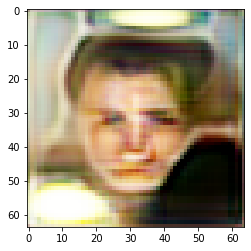

In [42]:
gen = gen.squeeze(0).permute(1, 2, 0).cpu().detach().numpy()

plt.imshow(gen)
plt.show()

In [ ]:
# it is learning quite slow. So, at epoch 3 it does not show good results.